# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [35]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# i is index for city in the city list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # % calculates if there will be a remainder
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and request/retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | pimenta bueno
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | kuanda
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | mount pearl
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | ipora
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | lethbridge
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | peterhead
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | manismata
Processing Record 20 of Set 1 | northam
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | dul'durga
Processing Reco

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,38.23,81,14,9.37,GS,1698703487
1,pimenta bueno,-11.6725,-61.1936,83.14,62,71,6.42,BR,1698703488
2,margaret river,-33.9500,115.0667,48.52,90,47,8.84,AU,1698703488
3,kuanda,56.3161,116.0806,9.19,55,37,0.65,RU,1698703489
4,puerto natales,-51.7236,-72.4875,44.08,51,64,3.78,CL,1698703489


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,38.23,81,14,9.37,GS,1698703487
1,pimenta bueno,-11.6725,-61.1936,83.14,62,71,6.42,BR,1698703488
2,margaret river,-33.9500,115.0667,48.52,90,47,8.84,AU,1698703488
3,kuanda,56.3161,116.0806,9.19,55,37,0.65,RU,1698703489
4,puerto natales,-51.7236,-72.4875,44.08,51,64,3.78,CL,1698703489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

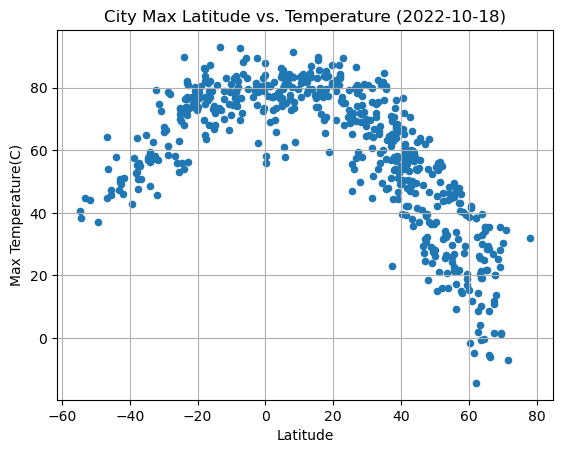

In [41]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True,
                title="City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

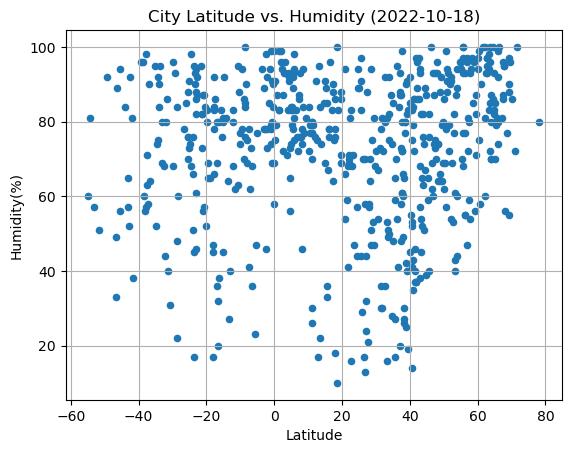

In [42]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True,
                title="City Latitude vs. Humidity (2022-10-18)")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

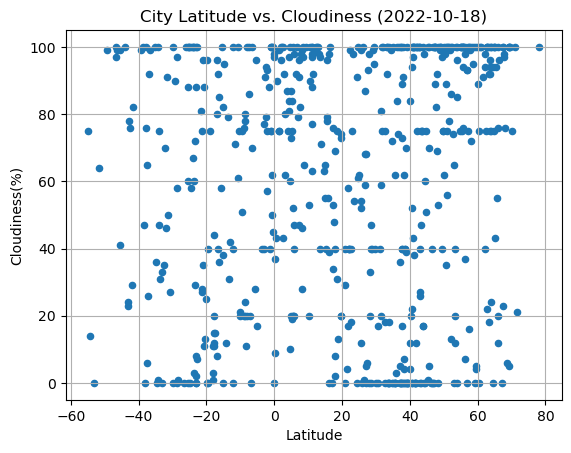

In [43]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True,
                title="City Latitude vs. Cloudiness (2022-10-18)")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

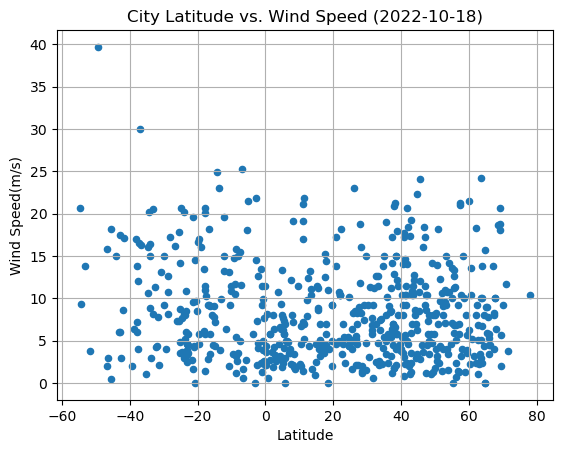

In [44]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True,
                title="City Latitude vs. Wind Speed (2022-10-18)")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-") 
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude") 
    plt.ylabel(title) 
    print(f'The r-value is: {rvalue**2}')
    plt.show() 


In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kuanda,56.3161,116.0806,9.19,55,37,0.65,RU,1698703489
6,udachny,66.4167,112.4000,-6.16,100,96,4.47,RU,1698703239
8,mount pearl,47.5166,-52.7813,38.84,74,100,10.36,CA,1698703491
9,tazovsky,67.4667,78.7000,1.45,96,23,3.96,RU,1698703430
12,lethbridge,49.7000,-112.8186,36.57,69,75,5.75,CA,1698703320


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,38.23,81,14,9.37,GS,1698703487
1,pimenta bueno,-11.6725,-61.1936,83.14,62,71,6.42,BR,1698703488
2,margaret river,-33.9500,115.0667,48.52,90,47,8.84,AU,1698703488
4,puerto natales,-51.7236,-72.4875,44.08,51,64,3.78,CL,1698703489
5,port-aux-francais,-49.3500,70.2167,37.04,92,99,39.71,TF,1698703490


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7217940842208246


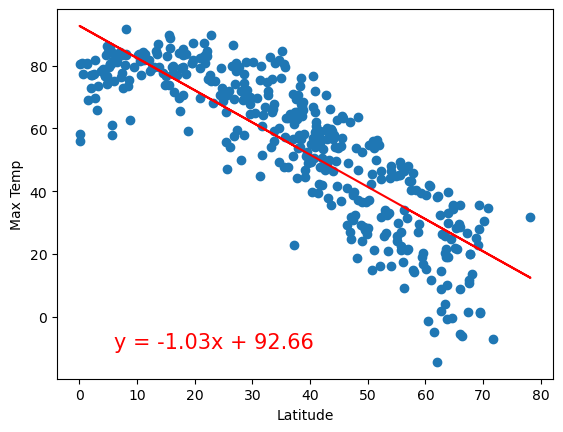

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp",(6,-10))

The r-value is: 0.6485328111547239


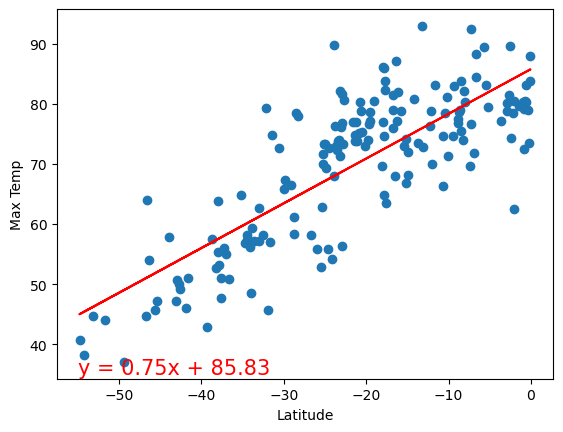

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp",(-55,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.010516921429616605


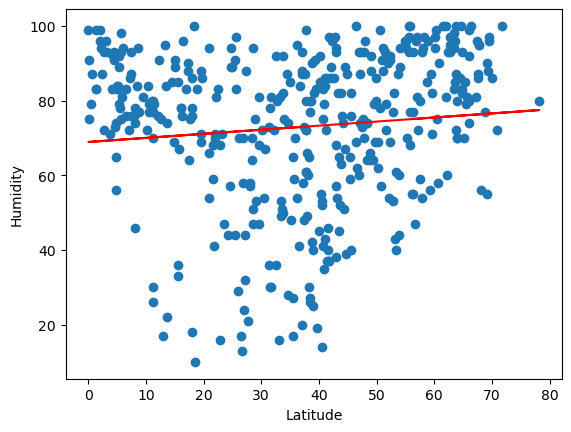

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity",(40,-10))

The r-value is: 0.0073125329482258096


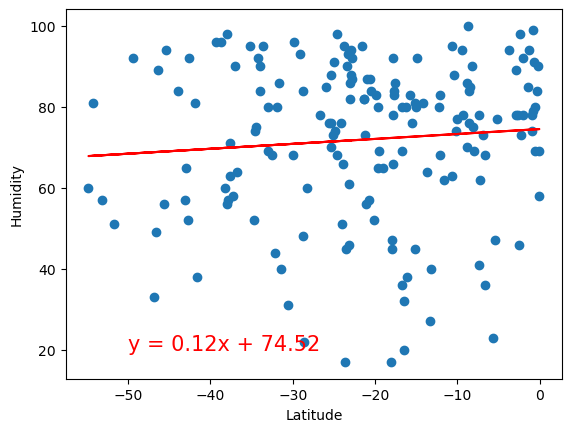

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity",(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.003528116967988327


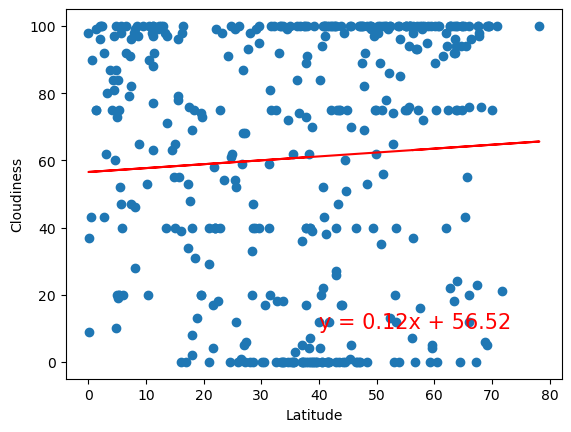

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness",(40,10))

The r-value is: 0.00033186962611898304


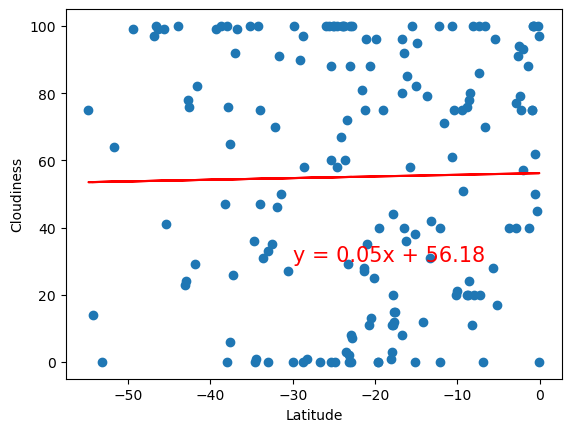

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness",(-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.016672599009997673


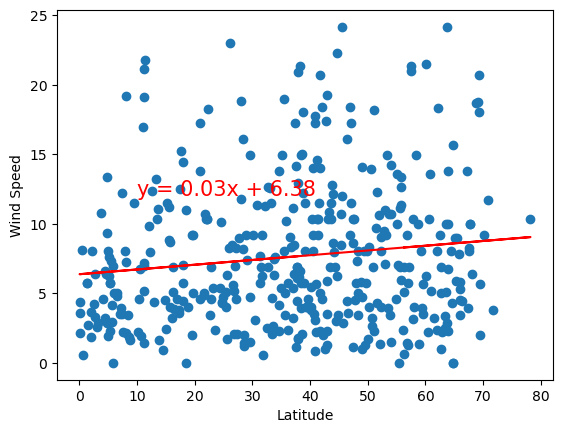

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed",(10,12))

The r-value is: 0.027087601942541024


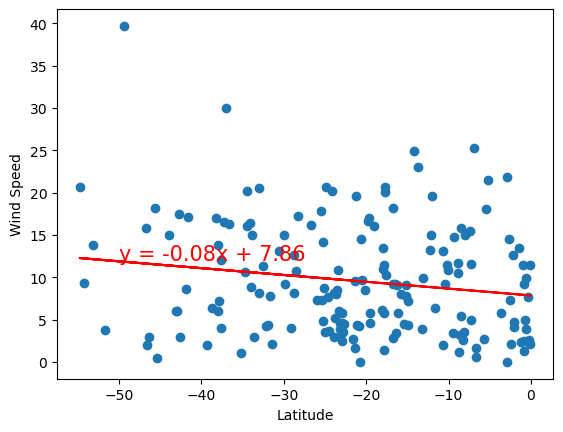

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed",(-50,12))

**Discussion about the linear relationship:** I've noticed, the lower the r-value on the linear regression, the less of a relationship the x and y values have. The 0.7 and 0.6 r-value graphs have strong correlation with the flow of the data. The graphs with 0.2, 0.02, r-values are very scattered, and don't show any 'real' pattern.